In [1]:
from numpy import pi, cos, sin, sqrt, arange, mod
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.cm as cm
import altair as alt
import pandas as pd
import numpy as np

In [2]:
alt.renderers.enable('notebook')
%matplotlib notebook

<IPython.core.display.Javascript object>


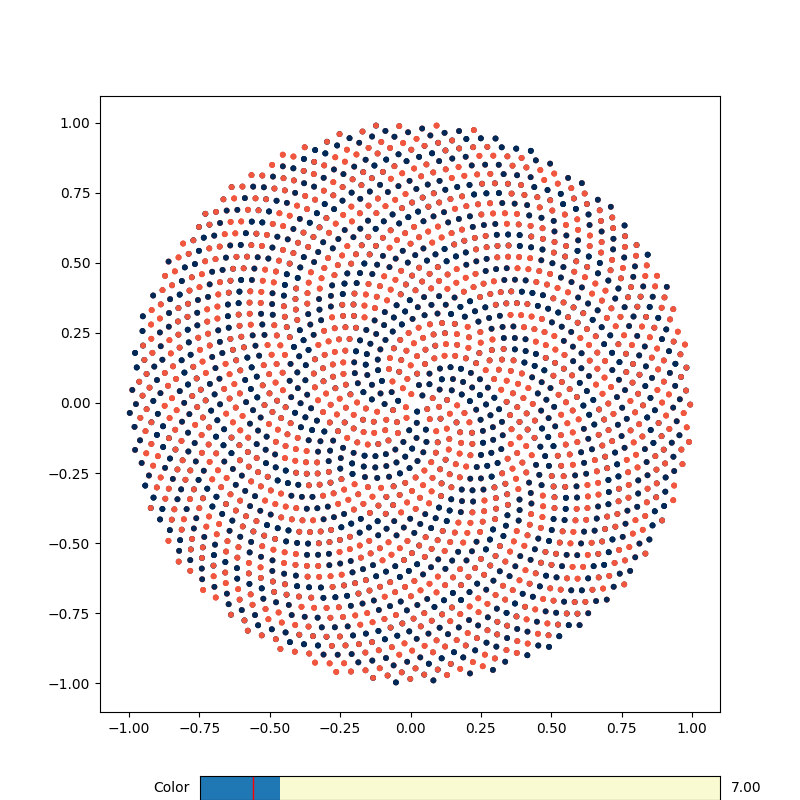

In [15]:
num_pts = 2000
indices = arange(0, num_pts, dtype=float) + 1
r = sqrt(indices / num_pts)
theta = pi * (1 + 5 ** 0.5) * (indices)
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot()
data = {}
plt.set_cmap('viridis')
data["x"] = r * cos(theta)
data["y"] = r * sin(theta)
data["color"] = indices
data = pd.DataFrame(data)
jyucolors = np.asarray([
    [241, 86, 63],
    [241, 86, 63],
    [241, 86, 63],
    [0, 41, 87],
    [0, 41, 87],
    [0, 41, 87],
    [241, 86, 63],
    [241, 86, 63],
    [241, 86, 63],
])
colors = jyucolors[(data['color']%2).astype(int)]/255
#axsc = ax.scatter(data['x'], data['y'], c=colors)
cmap = cm.get_cmap(name="gist_yarg")

axcolor = "lightgoldenrodyellow"
axcolor = plt.axes([0.25, 0, 0.65, 0.03], facecolor=axcolor)
color = Slider(axcolor, "Color", 1, 40, 5, valstep=1)

def colorfunc(label):
    indicescol = mod(indices, label)
    colors = jyucolors[(data['color']%label).astype(int)]/255
    ax.scatter(data['x'], data['y'], c=colors, s=10)  # Inefficient.
    # axsc.set_color(cmap(indicescol))  # This does not give a good colour representation.
    fig.canvas.draw_idle()

color.on_changed(colorfunc)

plt.show()
plt.savefig('Fibotest.svg')

In [155]:
plt.savefig('Fibo7.svg')

In [73]:
num_pts = 1000
indices = arange(0, num_pts, dtype=float) + 1
r = sqrt(indices / num_pts)
theta = pi * (1 + 5 ** 0.5) * (indices)
data = {}
data["x"] = r * cos(theta)
data["y"] = r * sin(theta)
data["color"] = indices
data = pd.DataFrame(data)
#slider = alt.binding_range(min=1, max=50, step=1)
#select_group = alt.selection_single(
#    name="color", fields=["color"], bind=slider, init={"color": 5}
#)
alt.Chart(data).mark_point().encode(x="x", y="y")

<IPython.core.display.Javascript object>


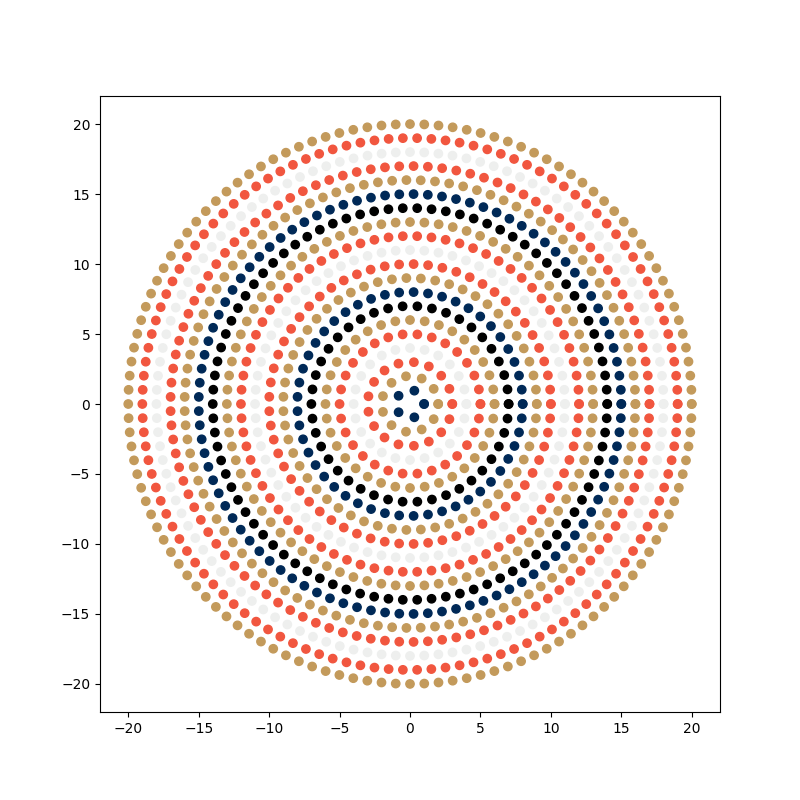

In [203]:
num_pts = 20
indices = np.linspace(1, num_pts, num_pts).astype(int)
data = {'x':[],'y':[],'index':[]}
scale = 1
for index in indices:
    numspots = int(2 * np.pi * index) * scale
    angles = np.linspace(0, 2 * np.pi, numspots)
    x = np.cos(angles) * index
    y = np.sin(angles) * index
    data['x'].extend(x.tolist())
    data['y'].extend(y.tolist())
    data['index'].extend([index]*len(x))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot()
data = pd.DataFrame(data)
jyucolors = np.asarray([
    [0, 0, 0],
    [0, 41, 87],
    [195, 154, 91],
    [241, 86, 63],
    [238, 239, 238],
    [241, 86, 63],
    [195, 154, 91],
])
colors = jyucolors[(data['index']%7).astype(int)]/255
axsc = ax.scatter(data['x'], data['y'], c=colors)

plt.show()
#plt.savefig('Fibotest.svg')

In [177]:
def fibo_noise(num_pts=2000, grouping=9, num_random=1500, marker_size=100, fig_size=8):
    # Fibonacci
    indices = arange(0, num_pts, dtype=float) + 1
    r = sqrt(indices / num_pts)
    theta = pi * (1 + 5 ** 0.5) * (indices)
    #Creating Figure Object
    fig = plt.figure(figsize=(fig_size, fig_size))
    ax = fig.add_subplot()
    # Datafile
    data = {}
    data["x"] = r * cos(theta)
    data["y"] = r * sin(theta)
    data["color"] = indices
    data = pd.DataFrame(data)
    #Jyu Colours
    jyucolors = np.asarray([
        [241, 86, 63],
        [241, 86, 63],
        [241, 86, 63],
        [0, 41, 87],
        [0, 41, 87],
        [0, 41, 87],
        [241, 86, 63],
        [241, 86, 63],
        [241, 86, 63],
    ])
    colors = jyucolors[(data['color']%grouping).astype(int)]/255
    ax.scatter(data['x'], data['y'], c=colors, s=marker_size)  # Pattern.

    random_noise = np.random.rand(num_random,2) - 1
    random_noise = pd.DataFrame(random_noise, columns=['x','y'])
    random_noise['color'] = (np.asarray([[241, 86, 63],[0, 41, 87]])/255).tolist() * int(num_random/2)
    random_noise = random_noise[random_noise['x']**2 + random_noise['y']**2 >1]
    plt.scatter(random_noise['x'], random_noise['y'], s=marker_size, c=random_noise['color'].values.tolist())
    plt.show()

    ax.set_xlim([-1, 0])
    ax.set_ylim([-1, 0])
    plt.axis('off')

    plt.savefig('Fibotest.svg')

<IPython.core.display.Javascript object>


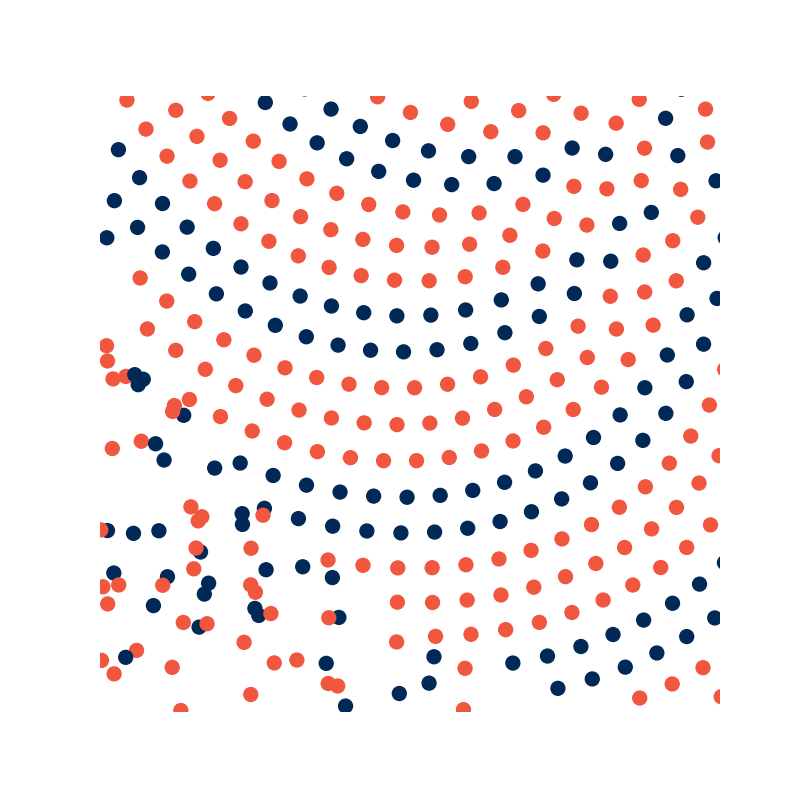

In [185]:
fibo_noise(num_pts=1000, grouping=5, num_random=400, marker_size=100, fig_size=8)